<a href="https://colab.research.google.com/github/ammarkurnia/Mini-Project-Forecasting_Mohammad-Ammar_3333210024_Kelas-D/blob/main/Mini_Project_UAS_Forecasting_Tesla_Stock_Data_Mohammad_Ammar_3333210024_Kelas_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Time Series**

A time-series is a series of data points indexed in time order and it is used to predict the future based on the previous observed values. Time series are very frequently plotted via line charts. Time series are used in statistics , weather forecasting, stock price prediction, pattern recognititon, earthquake prediction, e.t.c.

Time series analysis comprises methods for analysing time series data in order to extract meaningful statistics and other characteristics of the data.

Time series forecasting is the use of a model to predict future values based on previously observed values.

**Import Library**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
%matplotlib inline

Pada pengkodingan ini menggunakan library pandas untuk memproses dan menganalisis data. Library numpy untuk komputasi numerik atau perhitungan. Library matplotlib untuk visualisasi data. Library seaborn untuk visualisasi data juga dengan bebagai jenis plot visual. Library math untuk fungsi matematika. Dan library datetima untuk memanipulasi tanggal dan waktu.

**Import Dataset**

**Tentang Dataset**

Tesla, Inc. adalah kendaraan listrik Amerika dan perusahaan energi bersih yang berbasis di Palo Alto, California. Produk Tesla saat ini meliputi mobil listrik, penyimpanan energi baterai dari rumah hingga skala jaringan, panel surya dan genteng surya, serta produk dan layanan terkait lainnya.

Kumpulan data ini menyediakan data historis saham TESLA INC. (TSLA). Data tersedia pada tingkat harian. Mata uang adalah USD.

Sumber dataset : https://www.kaggle.com/datasets/varpit94/tesla-stock-data-updated-till-28jun2021

In [4]:
# https://drive.google.com/file/d/1xEu9yuL73SFY1YpVX0kRiFFuFXd31XqY/view?usp=sharing

!gdown 1xEu9yuL73SFY1YpVX0kRiFFuFXd31XqY

Downloading...
From: https://drive.google.com/uc?id=1xEu9yuL73SFY1YpVX0kRiFFuFXd31XqY
To: /content/TSLA.csv
100% 206k/206k [00:00<00:00, 139MB/s]


Perintah "!gdown" merupakan sebuah perintah yang digunakan untuk mengunduh file yang tersimpan di Google Drive menggunakan Google Drive API tanpa perlu membuka browser dan pengunduhan secara manual.

In [5]:
train_data = pd.read_csv('TSLA.csv')
train_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


Perintah ini digunakan untuk membaca atau menampilkan 5 data teratas yang digunakan ke dalam DataFrame.

Check missing values

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2956 non-null   object 
 1   Open       2956 non-null   float64
 2   High       2956 non-null   float64
 3   Low        2956 non-null   float64
 4   Close      2956 non-null   float64
 5   Adj Close  2956 non-null   float64
 6   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 161.8+ KB


Perintah ini digunakan untuk menampilkan informasi lengkap mengenai DataFrame dari 7 kolom yang ada. Dapat diketahui juga jumlah total dari masing-masing jenis tipe data. Serta untuk memastika bahwa data yang dipakai ini tidak terdapat missing value

Check statistic values for every features

In [7]:
train_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000,2.956000e+03
mean,138.691296,141.771603,135.425953,138.762183,138.762183,3.131449e+07
std,250.044839,255.863239,243.774157,250.123115,250.123115,2.798383e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,19.627000,20.402000,19.127500,19.615000,19.615000,1.310288e+07
50%,46.656999,47.487001,45.820002,46.545000,46.545000,2.488680e+07
75%,68.057001,69.357500,66.911501,68.103998,68.103998,3.973875e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08


"describe" digunakan untuk menampilkan statistik deskriptif dari setiap kolom dalam DataFrame, seperti jumlah data, rata-rata, standar deviasi, nilai minimum dan maksimum, serta quartil dari data.

Handle datetime data for time series

In [8]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data.set_index('Date', inplace=True)
train_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


[1] Mengubah kolom 'Date' menjadi tipe data datetime untuk pemrosesan data lebih lanjut
[2] Mengatur kolom 'Date' sebagai indeks dalam DataFrame, dengan perintah ini dapat memudahkan kita dalam mengolah data berdasarkan tanggal
[3] Menampilkan 5 baris data teratas setelah dilakukan perubahan

**EXPLORATORY DATA ANALYSIS**

Now let’s visualise the Adjusted Close (Stock Price when market closed)

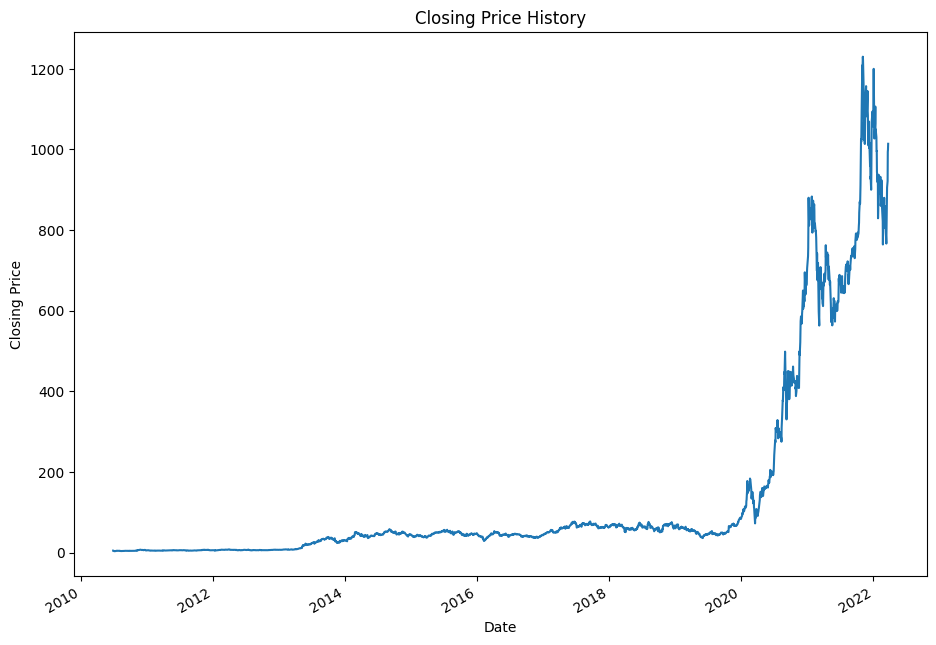

In [9]:
plt.figure(figsize=(11, 8)) # resizing the plot
train_data['Adj Close'].plot()
plt.title('Closing Price History') # adding a title
plt.xlabel('Date') # x label
plt.ylabel('Closing Price') # y label
plt.show()

Dataset yang digunakan adalah data stock saham TESLA selama 12 tahun sejak 2010 - 2022. Selanjutnya menampilkan data closingan yaitu data ketika pasar sahamnya ditutup. Dapat diketahui dari grafik di atas bahwa pergerakan saham TESLA dari tahun 2010 sampai 2020 menunjukkan sedikit kenaikan yang tidak signifikan, kemudian mulai pada tahun 2020 sampai 2022, grafik menunjukkan kenaikan yang signifikan hal tersebut merujuk pada harga dari saham TESLA ini mulai dari tahun 2020 sampai 2022 makin lama semakin naik. Dan dapat disimpulkan bahwa saham TESLA ini merupakan salah satu saham yang bagus karena trendnya cenderung naik untuk beberapa tahun kebelakang.

<Figure size 1600x800 with 0 Axes>

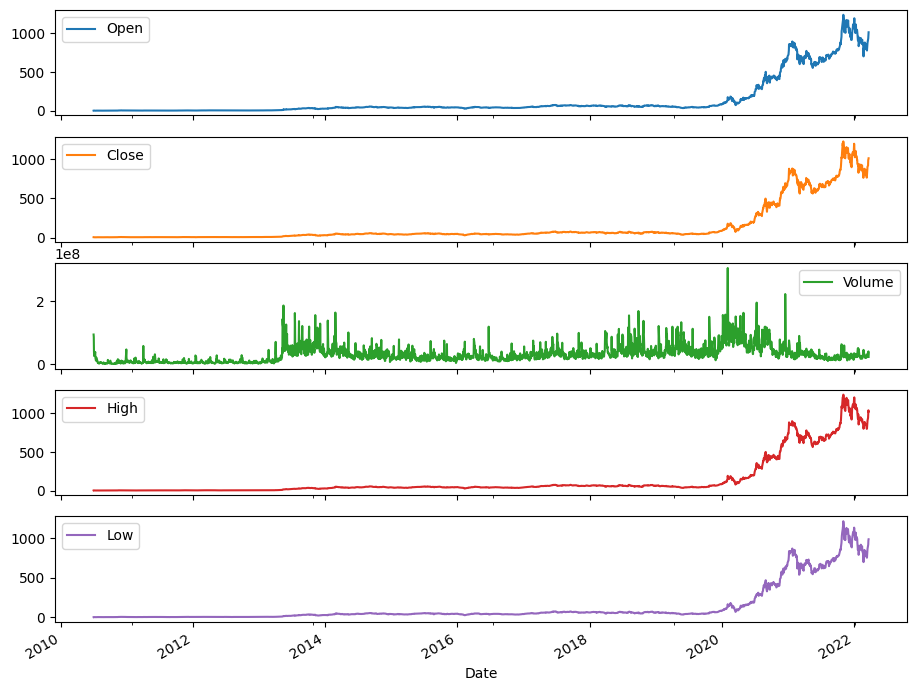

In [10]:
plt.figure(figsize=(16, 8)) # resizing the plot
cols = ['Open', 'Close', 'Volume', 'High', 'Low']
axes = train_data[cols].plot(figsize=(11, 9), subplots = True)
plt.show()

Selanjutnya mengecek dengan memvisualisasikan kolom-kolom yang lain seperti Open, Close, Volume, High, dan Low

Open = Harga Pembukaan,
High = Harga Tertinggi dalam transaksi dalam 1 hari,
Low = Harga Terendah dalam transaksi dalam 1 hari,
Close = Harga Penutupan,
Volume = Volume transaksi saham dalam 1 hari (lembar saham).

Dapat disimpulkan bahwa dari pergerakan saham TESLA di atas, untuk rata-rata kebanyakan fiturnya cenderung naik juga sama seperti harga penutupan harian. Namun berbeda dengan volumenya karena trendnya cenderung naik turun (stasioner), hal ini disebabkan oleh orang-orang yang membeli saham TESLA ini cenderung sama.

In [11]:
train_data['HL_PCT'] = (train_data['High'] - train_data['Low']) / train_data['Low'] * 100.0
train_data['PCT_change'] = (train_data['Close'] - train_data['Open']) / train_data['Open'] * 100.0

[1] Membuat kolom baru dengan nama 'HL_PCT'. Nilai dalam kolom 'HL_PCT' ini dihitung sebagai persentase perubahan antara harga tertinggi 'High' dan harga terendah 'Low' dibagi dengan harga terendah kemudian dikalikan dengan 100. Hal ini digunakan untuk mengukur persentase perubahan harga pada rentang hari tertentu.
[2] Sama halnya seperti sebelumnya, membuat kolom baru dengan nama 'PCT_Change'. Nilai kolom ini dihitung sebagai persentase perubahan antara harga penutupan 'Close' dan harga pembukaan 'Open' dibagi dengan harga pembukaan kemudian dikalikan dengan 100. Hal ini digunakan untuk memberikan gambaran tentang persentase perubahan harga pada hari perdagangan saham tersebut.

In [13]:
df = train_data[['HL_PCT', 'PCT_change', 'Adj Close','Volume']]
df.head()

,HL_PCT,PCT_change,Adj Close,Volume
Date,,,,
2010-06-29,42.531357,25.736842,4.778,93831500
2010-06-30,30.557940,-7.599845,4.766,85935500
2010-07-01,27.873705,-12.160000,4.392,41094000
2010-07-02,23.463389,-16.521739,3.840,25699000
2010-07-06,26.342388,-19.450000,3.222,34334500


Membuat DataFrame baru dengan nama 'df' yang terdiri dari 4 kolom dengan rujukan DataFrame sebelumnya yaitu 'train_data'. Setelah itu menampilkan 5 data teratas.

In [15]:
forecast_out = int(math.ceil(0.05 * len(df))) # forcasting out 5% of the entire dataset
print(forecast_out)
df['label'] = df['Adj Close'].shift(-forecast_out)
df.head()

148


<ipython-input-15-0ee7f664513b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['Adj Close'].shift(-forecast_out)


,HL_PCT,PCT_change,Adj Close,Volume,label
Date,,,,,
2010-06-29,42.531357,25.736842,4.778,93831500,4.802
2010-06-30,30.557940,-7.599845,4.766,85935500,4.820
2010-07-01,27.873705,-12.160000,4.392,41094000,4.782
2010-07-02,23.463389,-16.521739,3.840,25699000,4.788
2010-07-06,26.342388,-19.450000,3.222,34334500,4.726


[1] Digunakan untuk menghitung jumlah baris data yang akan digunakan untuk prediksi. Nilainya dihitung dengan mengalikan 0.05 dengan jumlah baris dalam DataFrame 'df'. Kemudian nilai tersebut dibulatkan ke atas dan hasilnya disimpan pada variabel 'forecast_out'
[2] Menampilkan banyaknya baris data yang akan diprediksi ke depan.
[3] Membuat kolom baru 'label'

Membuat harga penutupan sebagai label yang akan digunakan untuk prediksi. Dan menampilkan 5 data teratas setelah adanya perubahan.

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

Menggunakan beberapa model dari library sklearn seperti penskalaan data, membangun model regresi linier, ridge regression, random forest, dan support vector regression, membagi data menjadi subset pelatihan dan pengujian, serta mengevaluasi performa model menggunakan metrik mean squared log error.

It’s clear from the plot that there is an overall increase in the trend,with some seasonality in it.

In [25]:
scaler = StandardScaler()
X = np.array(df.drop(['label'], 1))
scaler.fit(X)
X = scaler.transform(X)

<ipython-input-25-7ce179678b12>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'], 1))


Menormalisasi data karena setiap data berbeda ukurannya. Diperlukan normalisasi supaya rangenya tidak terlalu jauh, dan saat train waktunya tidak terlalu lama dan memberikan hasil yang optimal.

[2] Mengkonversi data menjadi array numpy dan disimpan dalam variabel 'X'. Kolom 'label' dihilangkan karena merupakan target atau yang ingin diprediksi.
[3] Menghitung rata-rata dan variansi setiap fitur dalam data 'X'.
[4] Data 'X' diubah dengan mengurangi rata-rata dan dibagi dengan standar deviasi dari setiap fitur. Kemudian akan dinormalisasi dan memiliki rata-rata nol dan variansi satu.

In [26]:
X_Predictions = X[-forecast_out:] # data to be predicted
X = X[:-forecast_out] # data to be trained

Melakukan slicing, membagi data menjadi 2 subset untuk menentukan data X dan Y.

In [27]:
df.dropna(inplace=True)
y = np.array(df['label'])

<ipython-input-27-c3da9adb30d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


Data Y nya merupakan data label

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Splitting Data, menggunakan linear regression dan random forest.

Membagi data X dan data Y menjadi 4 subset, yaitu: X_train, X_test, y_train, dan y_test.
'test_size' merupakan parameter ukuran pengujian sebesai 20%, dan 80% sebagai parameter ukuran pelatihan.

In [29]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_confidence = lr.score(X_test, y_test)

Menggunakan model regresi linier

Setelah model dilatih dan diuji, pada variabel 'lr_confidence' akan berisi skor akurasi model pada data pengujian. Skor ini lah yang menentukan seberapa baik model ini dalam memprediksi nilai target data yang belum terlihat. Semakin tinggi skor akurasi, semakin baik model dalam melakukan prediksi.



In [30]:
lr_confidence

0.8129822210314108

Berikut hasil nilai skor akurasi dari model regresi linier

In [31]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_confidence = rf.score(X_test, y_test)

Menggunakan model random forest

Sama halnya seperti model regresi linier, semakin tinggi skor akurasi, maka akan semakin baik model dalam melakukan prediksi.

In [32]:
rf_confidence

0.9678795676571927

Berikut hasil nilai skor akurasi dari model random forest. Jika dibandingkan dengan model regresi linier, skor akurasi dari model random forest menunjukkan nilai yang lebih besar dan mendekati 1, jadi dapat disimpulkan untuk melakukan prediksi, model random forest lebih baik daripada model regresi linier.

In [33]:
last_date = df.index[-1] #getting the lastdate in the dataset
last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_unix + one_day # getting the time in seconds for the next day
forecast_set = rf.predict(X_Predictions) # predicting forecast data
df['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

<ipython-input-33-3eb2aa88d409>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast'] = np.nan
<ipython-input-33-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
<ipython-input-33-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len

Melakukan training pada data

Dengan melakukan loop untuk setiap prediksi dan menambahkannya ke dalam DataFrame, kita dapat menyimpan hasil prediksi tersebut dalam kolom 'forecast' pada tanggal yang sesuai dengan dataset. Dan memungkinkan untuk memvisualisasikan dan menganalisis hasil prediksi menggunakan data yang belum terlihat sebelumnya.

In [34]:
df.head()

,HL_PCT,PCT_change,Adj Close,Volume,label,Forecast
Date,,,,,,
2010-06-29,42.531357,25.736842,4.778,93831500.0,4.802,NaN
2010-06-30,30.557940,-7.599845,4.766,85935500.0,4.820,NaN
2010-07-01,27.873705,-12.160000,4.392,41094000.0,4.782,NaN
2010-07-02,23.463389,-16.521739,3.840,25699000.0,4.788,NaN
2010-07-06,26.342388,-19.450000,3.222,34334500.0,4.726,NaN


Menampilkan 5 data teratas setelah adanya perubahan

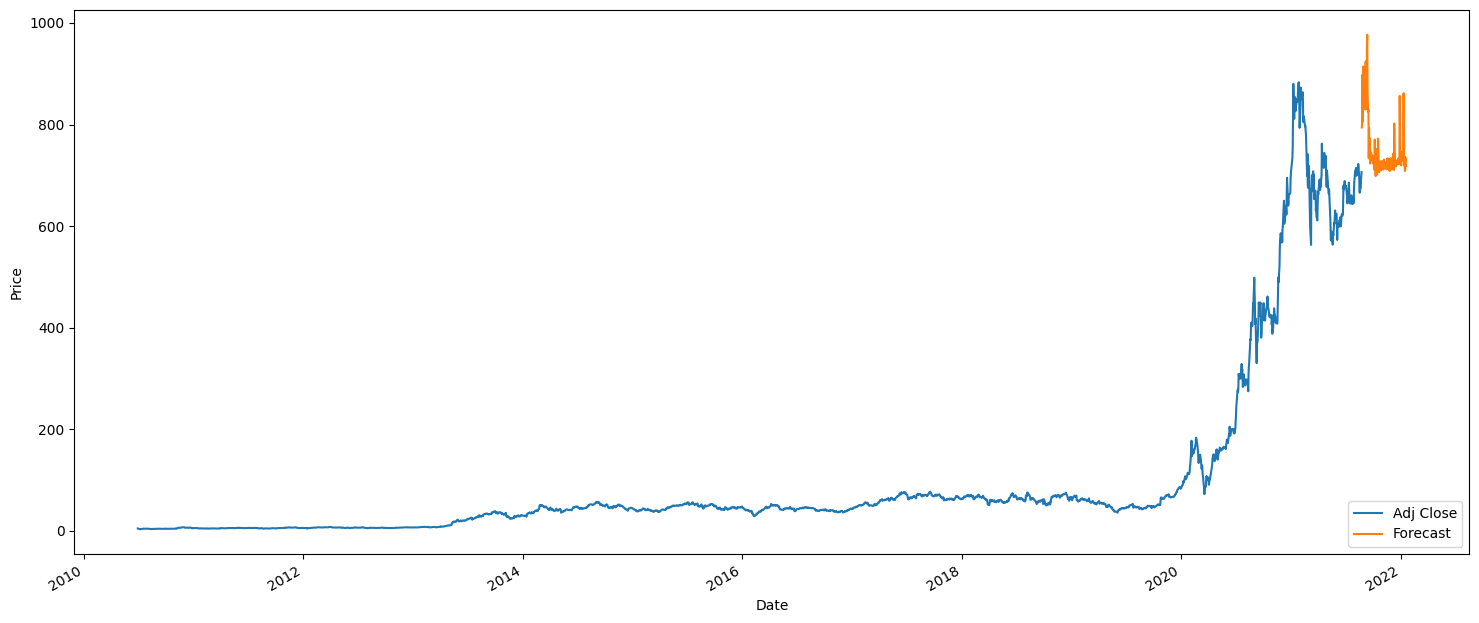

In [35]:
plt.figure(figsize=(18, 8))
df['Adj Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Menampilkan hasil prediksi (forecast) untuk beberapa bulan kedepan. Dengan garis biru sebagai harga penutupan dan garis oranye menunjukkan hasil prediksi ke depannya.

Karena nilai skor akurasi pada model random forest lebih besar dan mendekati 1 daripada model regresi linier, maka yang digunakan adalah model random forest. Kemudian model random forest ini tadi akan membaca data sebelumnya, kemudian akan dilakukan prediksi harga saham kedepannya. Dan hasil prediksi tersebut dapat dilihat pada gambar grafik di atas.